# Corner Detection

**The definition of corner** is a point whose local neighborhoods stands in two dominant and different edge directions.

## How It Works

### Harris Corner Detection

The basic intuition that corners can be detected by looking for changes in all directions.

- Shifting a "window" in any diraction would result in a large change in appearance when found a **Corner**;

- **Flat** regions will have no change in any directions;

- **Edges** won't have a major change along the edge direction.


[The full mathematics](https://en.wikipedia.org/wiki/Harris_Corner_Detector)

### Shi-Tomasi Corner Detection

Modify Harris Corner Detection to get better results.

It changes the scoring function selection criteria that Harris's uses

#### Harris uses:
```
R = a1*a2 - K(a1+a2)
```

#### Shi-Tomasi uses:
```
R = min(a1,a2)
```


In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Image Resource

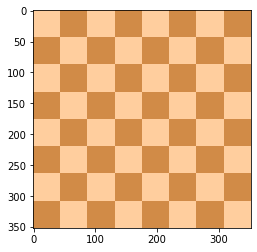

In [6]:
chess_img = cv.imread('../assets/flat_chessboard.png')
chess_img = cv.cvtColor(chess_img, cv.COLOR_BGR2RGB)
plt.imshow(chess_img)

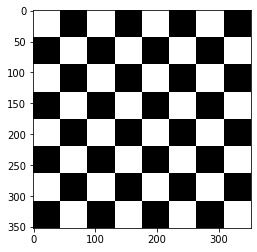

In [7]:
chess_img_gray = cv.cvtColor(chess_img, cv.COLOR_RGB2GRAY)
plt.imshow(chess_img_gray, cmap="gray")

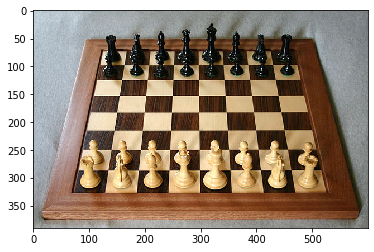

In [8]:
real_chess_img = cv.imread('../assets/real_chessboard.jpg')
real_chess_img = cv.cvtColor(real_chess_img, cv.COLOR_BGR2RGB)
plt.imshow(real_chess_img)

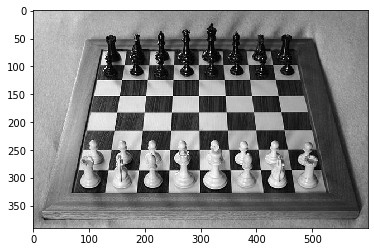

In [11]:
real_chess_img_gray = cv.cvtColor(real_chess_img, cv.COLOR_RGB2GRAY)
plt.imshow(real_chess_img_gray, cmap="gray")

## Applying Harris Corner Detection

### Coverting Units

To use Harris algorithm, we need to convert the image integer units to float point

In [16]:
float_img = np.float32(chess_img_gray)

### Applying the algorithm

- **blockSize:** The neighborhood size;
- **ksize:** The apperture parameter for the sobel operation.
- **k:** The harris detector free parameter

#### The K
where *k* is an empirically determined constant, 
*k exists in \[0.04,0.06\]*

In [17]:
result = cv.cornerHarris(float_img, blockSize=2, ksize=3, k=0.05)

### Showing the results

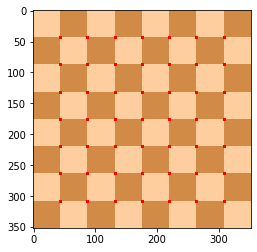

In [18]:
result = cv.dilate(result, None) # just to show the results
# Where my result of Harris Alg. is gratter tha 1% of the maximum value, will be colored RED.
chess_img[result>0.01*result.max()] = (255,0,0)
plt.imshow(chess_img)

### The real chessboard

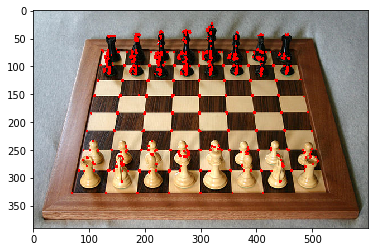

In [19]:
# Convert unitis
float_img = np.float32(real_chess_img_gray)
# Apply alg.
result = cv.cornerHarris(float_img, blockSize=2, ksize=3, k=0.05)
# Show results
result = cv.dilate(result, None)
real_chess_img[result>0.01*result.max()] = (255,0,0)
plt.imshow(real_chess_img)

### The screw's nut

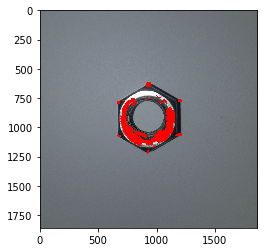

In [88]:
# Import
nut_img = cv.imread('../assets/porca_frontal.jpg')
nut_img = cv.cvtColor(nut_img, cv.COLOR_BGR2RGB)
gray_nut_img = cv.cvtColor(nut_img, cv.COLOR_RGB2GRAY)
# Convert unitis
float_nut_img = np.float32(gray_nut_img)
# Apply alg.
blockSize = 36
ksize = 31
k = 0.06
dst = cv.cornerHarris(float_nut_img, blockSize, ksize, k)
# Show results
dst = cv.dilate(dst, None)
nut_img[dst>0.01*dst.max()] = (255,0,0)
plt.imshow(nut_img)

## Applying Shi-Tomasi Corner Detection

### Reseting the images

In [107]:
chess_img = cv.imread('../assets/flat_chessboard.png')
chess_img = cv.cvtColor(chess_img, cv.COLOR_BGR2RGB)
chess_img_gray = cv.cvtColor(chess_img, cv.COLOR_RGB2GRAY)

### Applying the Shi-Tomasi

- **Max Corners:** How much corners we want to have (0 returns all corners found);
- **Quality Level** Quality level for the corner;
- **Min Distance:** Min distance between corners.



In [108]:
# Note, it doen't auto draw corners
corners = cv.goodFeaturesToTrack(chess_img_gray, 0, 0.01,10)

### Drawing the corners

The biggest desadvantege of 'goodFeaturesToTrack' is that it doen't automatic draw the corners.

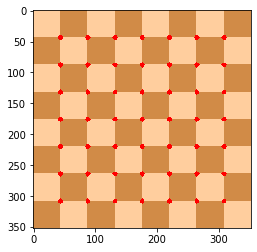

In [109]:
corners = np.int0(corners)

for corner in corners:
    x, y = corner.ravel()
    cv.circle(chess_img, (x,y), 4, (255,0,0), -1)

plt.imshow(chess_img)

### The real chessboard

In [120]:
real_chess_img = cv.imread('../assets/real_chessboard.jpg')
real_chess_img = cv.cvtColor(real_chess_img, cv.COLOR_BGR2RGB)
real_chess_img_gray = cv.cvtColor(real_chess_img, cv.COLOR_RGB2GRAY)

In [121]:
corners = cv.goodFeaturesToTrack(real_chess_img_gray, 80, 0.01,25)

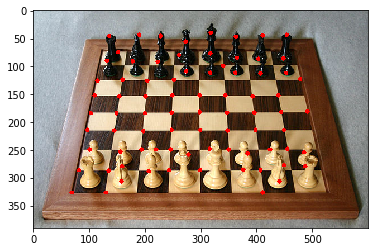

In [122]:
corners = np.int0(corners)

for corner in corners:
    x, y = corner.ravel()
    cv.circle(real_chess_img, (x,y), 4, (255,0,0), -1)

plt.imshow(real_chess_img)

### The screw's nut

In [229]:
# Import
nut_img = cv.imread('../assets/porca_frontal.jpg')
nut_img = cv.cvtColor(nut_img, cv.COLOR_BGR2RGB)
gray_nut_img = cv.cvtColor(nut_img, cv.COLOR_RGB2GRAY)

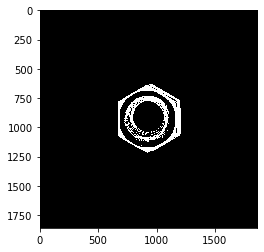

In [265]:

max_value = 255
block_size = 105
c = 27

threshold_img = cv.adaptiveThreshold(gray_nut_img, max_value, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, block_size, c)
threshold_img[0:, 0:580] = 0
threshold_img[0:, 1200:] = 0
plt.imshow(threshold_img, cmap="gray")

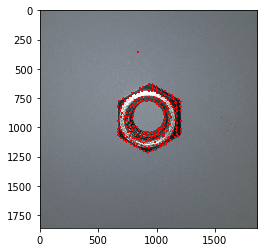

In [266]:
original_img_copy = nut_img.copy()
threshold_img_copy = threshold_img.copy()

# Apply alg
max_corners = 0
quality_level = 0.01
min_distance = 25

nut_corners = cv.goodFeaturesToTrack(threshold_img_copy, max_corners, quality_level,min_distance)
# Showing
nut_corners = np.int0(nut_corners)

for corner in nut_corners:
    x, y = corner.ravel()
    cv.circle(original_img_copy, (x,y), 10, (255,0,0), -1)
    
plt.imshow(original_img_copy)